<a href="https://colab.research.google.com/github/alcrepaldi/tera_inferencia/blob/main/inferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANDO BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sbn

IMPORTANDO CSV's

In [2]:
df_demo = pd.read_csv('DEMO_PHQ.csv', sep=',', encoding='UTF-8')
df_hei = pd.read_csv('PAG_HEI.csv', sep=',', encoding='UTF-8')

COMBINANDO OS DATAFRAMES

In [3]:
df_merger = pd.merge(df_demo, df_hei, on='SEQN')

REMOVENDO A COLUNA SEQN

In [4]:
df_merger.drop(columns='SEQN', axis=1, inplace = True)

ELIMINANDO OS VALORES NULOS

In [5]:
df_merger.fillna(0, inplace = True, axis=0)

CRIANDO INDICES DPQ

In [6]:
DPQ_col = []
for i in range(10, 91, 10):
    DPQ_col.append("DPQ0{}".format(i))

CONTANDO RESPOSTAS 7 E 9

In [7]:
resp_7_9 = {}
for col in DPQ_col:
    sete = len(df_merger[df_merger[col]== 7])
    nove = len(df_merger[df_merger[col]== 9])
    resp_7_9[col] = [sete, nove]


SUBSTITUINDO 7 E 9 POR 0

In [8]:
for coluna in DPQ_col:
    df_merger[coluna] = df_merger[coluna].replace([7,9], 0)

SOMANDO COLUNAS DPQ

In [9]:
df_merger['DPQ_TOTAL'] = df_merger[DPQ_col].sum(axis=1)

CLASSIFICANDO DPQ

In [10]:
df_merger['CLASSIF_DPQ'] = pd.cut(df_merger.DPQ_TOTAL, bins=[0,5,10,15,20,27], labels=[0,1,2,3,4], include_lowest=True)


SEXO X ALIMENTAÇÃO

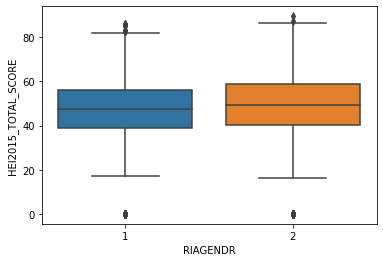

In [11]:
sbn.boxplot(
    data=df_merger,
    x='RIAGENDR',
    y='HEI2015_TOTAL_SCORE',
    orient='v'
)
plt.show()